Why Convolutional Neural Networks

The main structural feature of RegularNets is that all the neurons are connected to each other. For example, when we have images with 28 by 28 pixels with only greyscale, we will end up having 784 (28 x 28 x 1) neurons in a layer which seems manageable. However, most images have way more pixels and they are not grey-scaled. Therefore, assuming that we have a set of color images in 4K Ultra HD, we will have 26,542,080 (4096 x 2160 x 3) different neurons connected to each other in the first layer which is not really manageable. Therefore, we can say that RegularNets are not scalable for image classification. However, especially when it comes to images, there seems to be little correlation or relation between two individual pixels unless they are close to each other. This leads to the idea of Convolutional Layers and Pooling Layers.
Layers in a CNN

We are capable of using many different layers in a convolutional neural network. However, convolution, pooling, and fully connect layers are the most important ones. Therefore, I will quickly introduce these layers before implementing them.
Convolutional Layers

Convolutional layer is the very first layer where we extract features from the images in our datasets. Due to the fact that pixels are only related with the adjacent and close pixels, convolution allows us to preserve the relationship between different parts of an image. Convolution is basically filtering the image with a smaller pixel filter to decrease the size of the image without loosing the relationship between pixels. When we apply convolution to 5x5 image by using a 3x3 filter with 1x1 stride (1 pixel shift at each step). We will end up having a 3x3 output (64% decrease in complexity).

Pooling Layer

When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity. In addition, pooling layers also helps with the overfitting problem. Basically we select a pooling size to reduce the amount of the parameters by selecting the maximum, average, or sum values inside these pixels. Max Pooling, one of the most common pooling techniques, 

A Set of Fully Connected Layers

A fully connected network is our RegularNet where each parameter is linked to one another to determine the true relation and effect of each parameter on the labels. Since our time-space complexity is vastly reduced thanks to convolution and pooling layers, we can construct a fully connected network in the end to classify our images. A set of fully connected layers looks like this:

Now that you have some idea about the individual layers that we will use, I think it is time to share an overview look of a complete convolutional neural network.
A Convolutional Neural Network Example [3]

And now that you have an idea of convolutional neural network that you can build for image classification, we can get the most cliche dataset for classification: MNIST dataset, which stands for Modified National Institute of Standards and Technology database. It is a large database of handwritten digits that is commonly used for training various image processing system

Downloading the Mnist Data

The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, I will start with the following two lines to import tensorflow and MNIST dataset under the Keras API.

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students [4]. Therefore, in the second line, I have separated these two groups as train and test and also separated the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are. To visualize these numbers, we can get help from matplotlib.

3


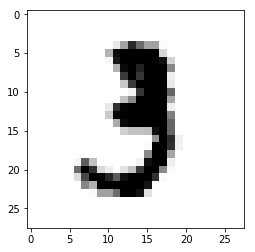

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 10
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

You will get (60000, 28, 28). As you might have guessed 60000 represents the number of images in the train dataset and (28, 28) represents the size of the image: 28 x 28 pixel.

Reshaping and Normalizing the Images

To be able to use the dataset in Keras API, we need 4-dims numpy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). 

'1' represents greyscale value

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Building the Convolutional Neural Network

We will build our model by using high level Keras API which uses either TensorFlow or Theano on the backend. I would like to mention that there are several high level TensorFlow APIs such as Layers, Keras, and Estimators which helps us create neural networks with high level knowledge. However, this may lead to confusion since they all varies in their implementation structure. Therefore, if you see completely different codes for the same neural network although they all use tensorflow, this is why. I will use the most straightforward API which is Keras. Therefore, I will import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. I have already talked about Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D array before building the fully connected layers.

In [8]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.
W0905 21:57:12.906712 24820 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 21:57:12.919679 24820 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 21:57:12.921638 24820 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 21:57:12.936598 24820 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0905 21:57:12.958543 24820 deprecation_wrapper.py:11

We may experiment with any number for the first Dense layer; however, the final Dense layer must have 10 neurons since we have 10 number classes (0, 1, 2, …, 9). You may always experiment with kernel size, pool size, activation functions, dropout rate, and number of neurons in the first Dense layer to get a better result.

Compiling and Fitting the Model

With the above code, we created an non-optimized empty CNN. Now it is time to set an optimizer with a given loss function which uses a metric. Then, we can fit the model by using our train data. 

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0905 21:57:39.165476 24820 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 21:57:39.182430 24820 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0905 21:57:39.269199 24820 deprecation.py:323] From C:\Users\shrey\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.2026 - acc: 0.94012s -  - ETA: 0s - loss: 0.20
Epoch 2/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.0813 - acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.0578 - acc: 0.9820
Epoch 4/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.0437 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.0352 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 29s 485us/step - loss: 0.0288 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 29s 485us/step - loss: 0.0243 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.0214 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.0192 - acc: 0.9932
Epoch 10/10
60000/60000 [=============================

You can experiment with the optimizer, loss function, metrics, and epochs. However, I can say that adam optimizer is usually out-performs the other optimizers. I am not sure if you can actually change the loss function for multi-class classification. Feel free to experiment and comment below. Epoch number might seem a bit small. However, you will reach to 98–99% test accuracy. Since the MNIST dataset does not require heavy computing power, you may easily experiment with the epoch number as well.

Evaluating the Model

Finally, you may evaluate the trained model with x_test and y_test 

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 131us/step


[0.05256365565882879, 0.9863]

We achieved 98.6% accuracy with such basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. 

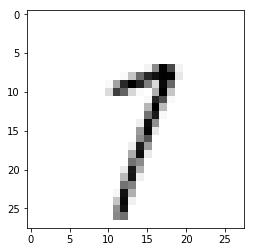

In [30]:
image_index = 3213
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')


In [31]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))# MNIST has array of size 784
print(pred.argmax())

7
